In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
train_dataset = './datasets/archive/sign_mnist_train.csv'
test_dataset= './datasets/archive/sign_mnist_test.csv'

In [21]:
train_df = pd.read_csv(train_dataset)
test_df = pd.read_csv(test_dataset)

In [43]:
train_df.head(40)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
5,16,161,168,172,173,178,184,189,193,196,...,76,74,68,62,53,55,48,238,255,255
6,8,134,134,135,135,136,137,137,138,138,...,109,102,91,65,138,189,179,181,181,179
7,22,114,42,74,99,104,109,117,127,142,...,214,218,220,223,223,225,227,227,228,228
8,3,169,174,176,180,183,185,187,188,190,...,119,118,123,120,118,114,94,74,61,57
9,3,189,189,189,190,190,191,190,190,190,...,13,53,200,204,201,201,193,175,178,156


----------------------------------------------------------

## KNN

x_train has 27455 images of 785 pixels

In [5]:
x_train = train_df.iloc[0:20000, 1:785].values
y_train = train_df.iloc[0:20000, 0].values

test data has 7172 images 

In [6]:
x_test = test_df.iloc[0:5000, 1:785].values
y_test = test_df.iloc[0:5000,0].values

### Standard Scaler

In [22]:
def variance(data):
    n = len(data)
    mean = sum(data) / n
    deviations = [(x-mean)**2 for x in data]
    variance = sum(deviations) / n
    return variance

In [23]:
def std(data):
    return np.sqrt(variance(data))

In [24]:
def normalize(data):
    mean = sum(data) / len(data)
    standardDev = std(data)
    normalized=[]
    for i in data:
        norm = (i - mean) / standardDev
        normalized.append(norm)
    return np.array(normalized)

------------------------------------------------------

### K-Nearest Neighbor algorithm

In [7]:
def most_common(lst):
    return max(set(lst), key=lst.count)

In [8]:
def euclidean(point, data):
    return np.sqrt(np.sum((point-data)**2, axis=1))

In [9]:
def manhattan(point, data):
    return np.sum((point-data), axis=1)

In [10]:
class KNN():
    def __init__(self, k, dist_metric):
        self.k = k
        self.dist_metric = dist_metric    
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        
    def predict(self, X_test):
        neighbors=[]
        for x in X_test:
            distances = self.dist_metric(x, self.X_train)
            y_sorted = [y for _, y in sorted(zip(distances, self.y_train))]
            neighbors.append(y_sorted[:self.k])        
        return list(map(most_common, neighbors))
    
    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        accuracy = sum(y_pred == y_test) / len(y_test)
        return accuracy

----------------------------------------------

### Training 

#### Manhattan distance, Training size 10000 samples

In [55]:
x_train = train_df.iloc[0:10000, 1:785].values
y_train = train_df.iloc[0:10000, 0].values
x_test = test_df.iloc[0:7000, 1:785].values
y_test = test_df.iloc[0:7000,0].values

x_train = normalize(x_train)
x_test = normalize(x_test)

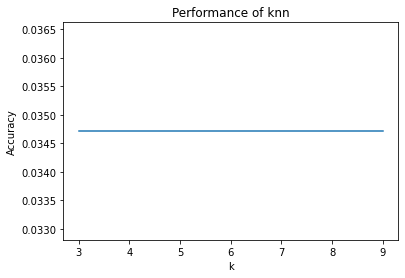

In [56]:
accuracies=[]
ks = [3,5,7,9]
for k in ks:
    knn=KNN(k=k, dist_metric=manhattan)
    knn.fit(x_train, y_train)
    accuracy = knn.evaluate(x_test, y_test)
    accuracies.append(accuracy)
    
fig, ax = plt.subplots()
ax.plot(ks, accuracies)
ax.set(xlabel="k",
       ylabel="Accuracy",
       title="Performance of knn")
plt.show()

In [57]:
three, five, seven, nine = accuracies
print('k=3 ', three)
print('k=5 ', five)
print('k=7 ', seven)
print('k=9 ', nine)

k=3  0.03471428571428571
k=5  0.03471428571428571
k=7  0.03471428571428571
k=9  0.03471428571428571


<br/>

#### Manhattan distance, Training size 27455 samples

In [58]:
x_train = train_df.iloc[0:27455, 1:785].values
y_train = train_df.iloc[0:27455, 0].values
x_test = test_df.iloc[0:7000, 1:785].values
y_test = test_df.iloc[0:7000,0].values

x_train = normalize(x_train)
x_test = normalize(x_test)

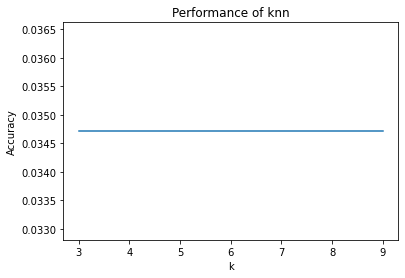

In [59]:
accuracies=[]
ks = [3,5,7,9]
for k in ks:
    knn=KNN(k=k, dist_metric=manhattan)
    knn.fit(x_train, y_train)
    accuracy = knn.evaluate(x_test, y_test)
    accuracies.append(accuracy)
    
fig, ax = plt.subplots()
ax.plot(ks, accuracies)
ax.set(xlabel="k",
       ylabel="Accuracy",
       title="Performance of knn")
plt.show()

In [60]:
three, five, seven, nine = accuracies
print('k=3 ', three)
print('k=5 ', five)
print('k=7 ', seven)
print('k=9 ', nine)

k=3  0.03471428571428571
k=5  0.03471428571428571
k=7  0.03471428571428571
k=9  0.03471428571428571


<br/>

#### Euclidean distance. Training 10000 samples.

In [61]:
x_train = train_df.iloc[0:10000, 1:785].values
y_train = train_df.iloc[0:10000, 0].values
x_test = test_df.iloc[0:7000, 1:785].values
y_test = test_df.iloc[0:7000,0].values

x_train = normalize(x_train)
x_test = normalize(x_test)

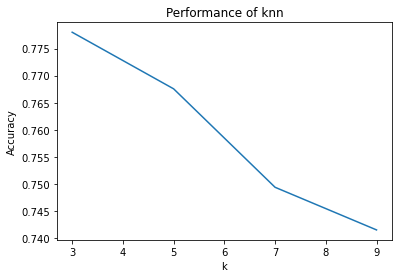

In [62]:
accuracies=[]
ks = [3,5,7,9]
for k in ks:
    knn=KNN(k=k, dist_metric=euclidean)
    knn.fit(x_train, y_train)
    accuracy = knn.evaluate(x_test, y_test)
    accuracies.append(accuracy)
    
fig, ax = plt.subplots()
ax.plot(ks, accuracies)
ax.set(xlabel="k",
       ylabel="Accuracy",
       title="Performance of knn")
plt.show()

In [63]:
three, five, seven, nine = accuracies
print('k=3 ', three)
print('k=5 ', five)
print('k=7 ', seven)
print('k=9 ', nine)

k=3  0.778
k=5  0.7675714285714286
k=7  0.7494285714285714
k=9  0.7415714285714285


<br/>

#### Euclidean distance. Training size 27455.

In [64]:
x_train = train_df.iloc[0:27455, 1:785].values
y_train = train_df.iloc[0:27455, 0].values
x_test = test_df.iloc[0:7172, 1:785].values
y_test = test_df.iloc[0:7172,0].values

x_train = normalize(x_train)
x_test = normalize(x_test)

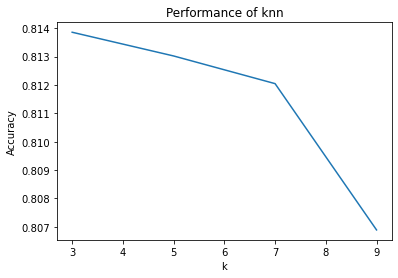

In [65]:
accuracies=[]
ks = [3,5,7,9]
for k in ks:
    knn=KNN(k=k, dist_metric=euclidean)
    knn.fit(x_train, y_train)
    accuracy = knn.evaluate(x_test, y_test)
    accuracies.append(accuracy)
    
fig, ax = plt.subplots()
ax.plot(ks, accuracies)
ax.set(xlabel="k",
       ylabel="Accuracy",
       title="Performance of knn")
plt.show()

In [66]:
three, five, seven, nine = accuracies
print('k=3 ', three)
print('k=5 ', five)
print('k=7 ', seven)
print('k=9 ', nine)

k=3  0.8138594534300055
k=5  0.8130228667038483
k=7  0.8120468488566648
k=9  0.8068878973786949


<br/>